In [6]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn
# !pip install xgboost

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder

## Read data

In [8]:
df = pd.read_csv('Datasets/merged_df_onehotencode.csv')

df.head()

,date,flight,duration,price,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,...,arr_time_Evening,arr_time_Night,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,class_business,class_economy
0,2022-02-11,AI-868,2.00,25612.0,True,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
1,2022-02-11,AI-624,2.25,25612.0,True,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
2,2022-02-11,AI-531,24.75,42220.0,True,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
3,2022-02-11,AI-839,26.50,44450.0,True,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
4,2022-02-11,AI-544,6.67,46690.0,True,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False


## Check for null values

In [9]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Display the null values
print("Null Values:")
print(null_values)

Null Values:
date                      0
flight                    0
duration                  4
price                     0
airline_Air India         0
airline_AirAsia           0
airline_GO FIRST          0
airline_Indigo            0
airline_SpiceJet          0
airline_StarAir           0
airline_Trujet            0
airline_Vistara           0
stop_0                    0
stop_1                    0
stop_2                    0
dep_time_Late_Night       0
dep_time_Early_Morning    0
dep_time_Morning          0
dep_time_Afternoon        0
dep_time_Evening          0
dep_time_Night            0
from_Bangalore            0
from_Chennai              0
from_Delhi                0
from_Hyderabad            0
from_Kolkata              0
from_Mumbai               0
arr_time_Late_Night       0
arr_time_Early_Morning    0
arr_time_Morning          0
arr_time_Afternoon        0
arr_time_Evening          0
arr_time_Night            0
to_Bangalore              0
to_Chennai                0
to_Delh

In [10]:
# Remove rows with null values
df = df.dropna()

# Check if null values are removed
print("Null Values After Removal:")
print(df.isnull().sum())

Null Values After Removal:
date                      0
flight                    0
duration                  0
price                     0
airline_Air India         0
airline_AirAsia           0
airline_GO FIRST          0
airline_Indigo            0
airline_SpiceJet          0
airline_StarAir           0
airline_Trujet            0
airline_Vistara           0
stop_0                    0
stop_1                    0
stop_2                    0
dep_time_Late_Night       0
dep_time_Early_Morning    0
dep_time_Morning          0
dep_time_Afternoon        0
dep_time_Evening          0
dep_time_Night            0
from_Bangalore            0
from_Chennai              0
from_Delhi                0
from_Hyderabad            0
from_Kolkata              0
from_Mumbai               0
arr_time_Late_Night       0
arr_time_Early_Morning    0
arr_time_Morning          0
arr_time_Afternoon        0
arr_time_Evening          0
arr_time_Night            0
to_Bangalore              0
to_Chennai           

## Perform ordinal encoding

In [12]:
# Perform ordinal encoding on categorical columns
ordinal_encoder = OrdinalEncoder()
df[['date', 'flight']] = ordinal_encoder.fit_transform(df[['date', 'flight']])

df.head()

,date,flight,duration,price,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,...,arr_time_Evening,arr_time_Night,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,class_business,class_economy
0,0.0,877.0,2.00,25612.0,True,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
1,0.0,795.0,2.25,25612.0,True,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
2,0.0,762.0,24.75,42220.0,True,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
3,0.0,871.0,26.50,44450.0,True,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
4,0.0,770.0,6.67,46690.0,True,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False


## Correlation with price

In [13]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

Correlation with 'price':
date                     -0.091926
flight                    0.306186
duration                  0.204468
airline_Air India         0.070181
airline_AirAsia          -0.176110
airline_GO FIRST         -0.194086
airline_Indigo           -0.280746
airline_SpiceJet         -0.113963
airline_StarAir          -0.010019
airline_Trujet           -0.009083
airline_Vistara           0.360951
stop_0                   -0.187403
stop_1                    0.200001
stop_2                   -0.064188
dep_time_Late_Night      -0.031191
dep_time_Early_Morning   -0.017476
dep_time_Morning          0.024035
dep_time_Afternoon       -0.054653
dep_time_Evening          0.011865
dep_time_Night            0.036532
from_Bangalore            0.011565
from_Chennai              0.018835
from_Delhi               -0.043149
from_Hyderabad           -0.013123
from_Kolkata              0.016231
from_Mumbai               0.013284
arr_time_Late_Night      -0.093537
arr_time_Early_Morning   -0.0

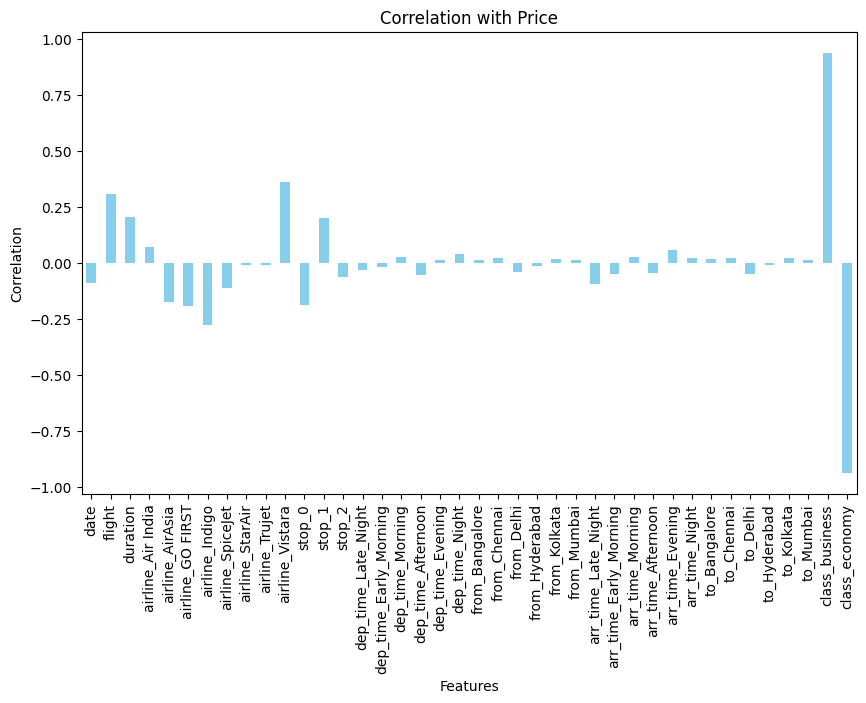

In [14]:
# Extract the correlation of each feature with the target variable ("price")
correlation_with_price = correlation_matrix['price'].drop('price')  # Exclude the target variable itself

# Display the correlation values with the target variable
print("Correlation with 'price':")
print(correlation_with_price)

# Visualize only the correlation values related to the target variable using a bar plot
plt.figure(figsize=(10, 6))
correlation_with_price.plot(kind='bar', color='skyblue')
plt.title('Correlation with Price')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

## Split train and test data

In [23]:
X = df.drop(['price'], axis=1)
y = df['price']

# Split the data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model training

In [24]:
# List of models to train
models = [
    LinearRegression(),
    Ridge(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    XGBRegressor()
]

trained_models = []

# Train and save each model
for model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Save the trained model
    trained_models.append(model)

## Model Evaluation
- With MSE and R2

In [25]:
mse_result = []
r2_results = []

# Evaluate each trained model
for model in trained_models:
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model using Mean Squared Error (MSE) and r2
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append the MSE and R2 for each model
    mse_result.append(mse)
    r2_results.append(r2)

In [28]:
# Define model name
model_name = [
    'Linear Regression',
    'Ridge',
    'Decision Tree Regressor',
    'Random Forest Regressor',
    'XGB Regressor'
]

# Use zip to iterate through lists simultaneously to print the results
for model, mse, r2 in zip(model_name, mse_result, r2_results):
    print(f'{model}: \nMSE: {mse}, R2: {r2}')

Linear Regression: 
MSE: 46157167.98627523, R2: 0.9102778856182852
Ridge: 
MSE: 46157120.29937493, R2: 0.9102779783139532
Decision Tree Regressor: 
MSE: 8751897.033374533, R2: 0.9829877191139865
Random Forest Regressor: 
MSE: 5375234.000788597, R2: 0.9895514092201099
XGB Regressor: 
MSE: 8554326.114071596, R2: 0.9833717652197934


With test_size=0.3  

Linear Regression:   
MSE: 46157167.98627523, R2: 0.9102778856182852  
Ridge:   
MSE: 46157120.29937493, R2: 0.9102779783139532  
Decision Tree Regressor:   
MSE: 8751897.033374533, R2: 0.9829877191139865  
Random Forest Regressor:   
MSE: 5375234.000788597, R2: 0.9895514092201099  
XGB Regressor:   
MSE: 8554326.114071596, R2: 0.9833717652197934  

## Plot Actual Vs Predicted Price

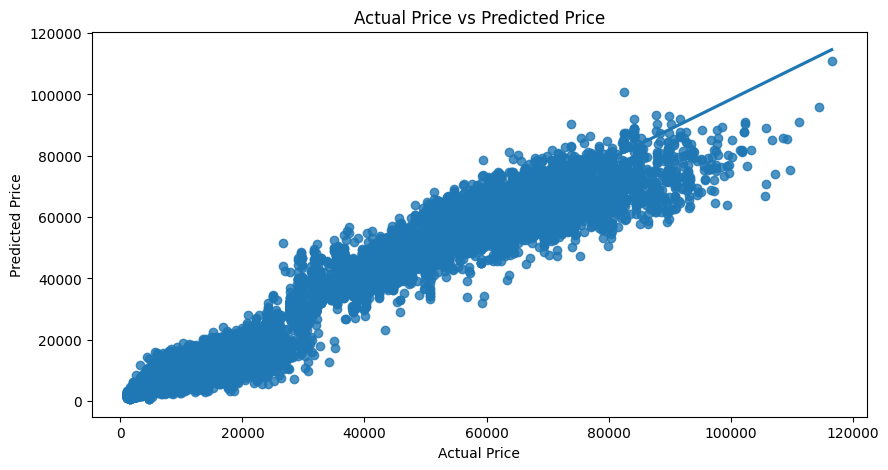

In [27]:
results = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

plt.figure(figsize=(10,5))

sns.regplot(x='Actual Price', y='Predicted Price', data=results)

plt.title('Actual Price vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()